# Predictive Thyroid Disease Project - EDA

To make a predictive model where you input factors of a person and have it predict if they are likely to have thyroid disease or not. The accuracy has to be above 95% to be considered successful.

# Initial Set Up

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder



# Import my custom library 
import MyCustDataSciLib as MyCustDataSciLib

In [2]:
# load the cleaned data

df = pd.read_csv("Thyroid_Disease_DataWrangled.csv")

In [3]:
# Display number of rows, column names, and column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking               383 non-null    object
 3   hx_smoking            383 non-null    object
 4   hx_radiotherapy       383 non-null    object
 5   thyroid_function      383 non-null    object
 6   physical_examination  383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk                  383 non-null    object
 11  t                     383 non-null    object
 12  n                     383 non-null    object
 13  m                     383 non-null    object
 14  stage                 383 non-null    object
 15  response              383 non-null    ob

In [21]:
# again check for missing data 
df.isnull().sum()

age                     0
gender                  0
smoking                 0
hx_smoking              0
hx_radiotherapy         0
thyroid_function        0
physical_examination    0
adenopathy              0
pathology               0
focality                0
risk                    0
t                       0
n                       0
m                       0
stage                   0
response                0
recurrence              0
dtype: int64

In [4]:
# Display the first few rows
df.head()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence
0,27,f,no,no,no,euthyroid,single_nodular_goiter-left,no,micropapillary,uni-focal,low,t1a,n0,m0,i,indeterminate,no
1,34,f,no,yes,no,euthyroid,multinodular_goiter,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
2,30,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
3,62,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
4,62,f,no,no,no,euthyroid,multinodular_goiter,no,micropapillary,multi-focal,low,t1a,n0,m0,i,excellent,no


In [5]:
# Display the last few rows
df.tail()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence
378,72,m,yes,yes,yes,euthyroid,single_nodular_goiter-right,right,papillary,uni-focal,high,t4b,n1b,m1,ivb,biochemical_incomplete,yes
379,81,m,yes,no,yes,euthyroid,multinodular_goiter,extensive,papillary,multi-focal,high,t4b,n1b,m1,ivb,structural_incomplete,yes
380,72,m,yes,yes,no,euthyroid,multinodular_goiter,bilateral,papillary,multi-focal,high,t4b,n1b,m1,ivb,structural_incomplete,yes
381,61,m,yes,yes,yes,clinical_hyperthyroidism,multinodular_goiter,extensive,hurthel_cell,multi-focal,high,t4b,n1b,m0,iva,structural_incomplete,yes
382,67,m,yes,no,no,euthyroid,multinodular_goiter,bilateral,papillary,multi-focal,high,t4b,n1b,m0,iva,structural_incomplete,yes


In [6]:
# Display random sample

df.sample(n=5, random_state=42)

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence
268,32,f,no,no,no,euthyroid,single_nodular_goiter-left,no,papillary,uni-focal,low,t3a,n0,m0,i,excellent,no
250,30,f,no,no,no,subclinical_hypothyroidism,normal,right,follicular,uni-focal,low,t3a,n0,m0,i,excellent,no
318,30,f,no,no,no,euthyroid,multinodular_goiter,bilateral,papillary,multi-focal,intermediate,t3a,n1b,m0,i,structural_incomplete,yes
331,51,f,no,no,no,euthyroid,single_nodular_goiter-left,no,follicular,uni-focal,intermediate,t3a,n0,m0,i,structural_incomplete,yes
56,43,f,no,yes,no,euthyroid,single_nodular_goiter-right,no,papillary,uni-focal,low,t1b,n0,m0,i,excellent,no


# Descriptive statistic of numerical columns

In [ ]:
# Descriptive statistics for numerical columns in entire df
# Age is the only column with continuous value so descriptive analysis will work better on it

df.describe()

# the youngest age is 15
# the oldest age is 82
# Median age is 37 with avg 40 which is higher than the median thus slightly skew to older, thus implying few very old individuals moving moving the avg older
# std of 15 means 68% of the data falls within 1 std between 40+-15 so between 25 and 56

,age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


# Visualizing Outliers if have any

In [7]:
# removed outliers in the data wrangling step but just in case

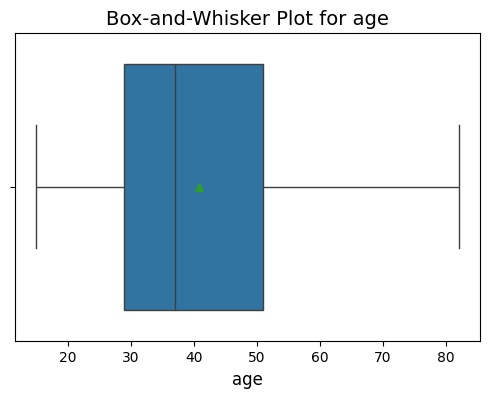

In [8]:
# Doing the age column as the only continous value column
MyCustDataSciLib.visualize_outliers(df, 'age')
# reminder for me,
    # the line in the box is the median
    # the green triangle is the mean

# there are no outliers in the age column 

# Checking Column Type (Categorical or Numeric)

In [9]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking               383 non-null    object
 3   hx_smoking            383 non-null    object
 4   hx_radiotherapy       383 non-null    object
 5   thyroid_function      383 non-null    object
 6   physical_examination  383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk                  383 non-null    object
 11  t                     383 non-null    object
 12  n                     383 non-null    object
 13  m                     383 non-null    object
 14  stage                 383 non-null    object
 15  response              383 non-null    ob

In [10]:
df.head()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence
0,27,f,no,no,no,euthyroid,single_nodular_goiter-left,no,micropapillary,uni-focal,low,t1a,n0,m0,i,indeterminate,no
1,34,f,no,yes,no,euthyroid,multinodular_goiter,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
2,30,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
3,62,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
4,62,f,no,no,no,euthyroid,multinodular_goiter,no,micropapillary,multi-focal,low,t1a,n0,m0,i,excellent,no


In [11]:
# numeric columns
    # 'age'

# categorical columns
    # everything except for 'age'
    # alot of these can definitely be converted to numeric columns in feature engineering step

# Distribution of Values within Each Column

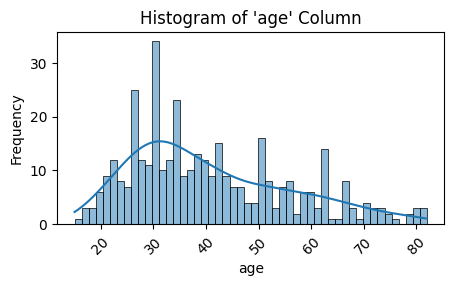

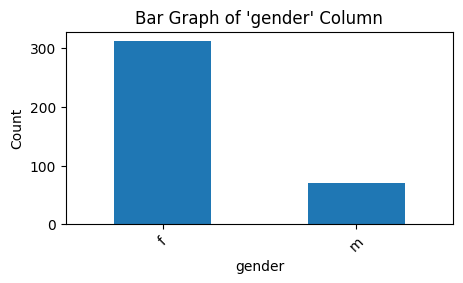

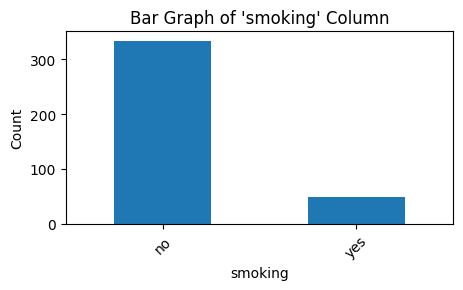

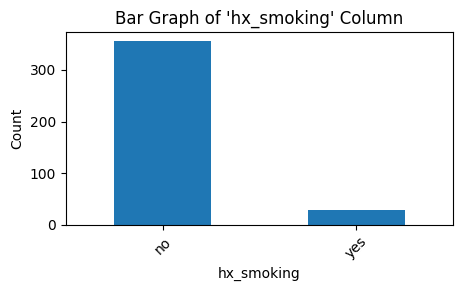

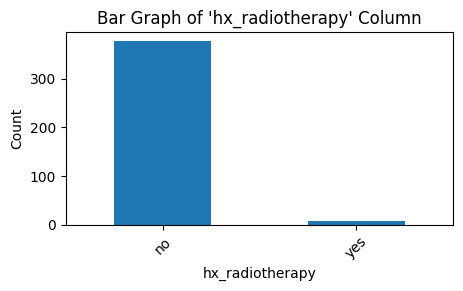

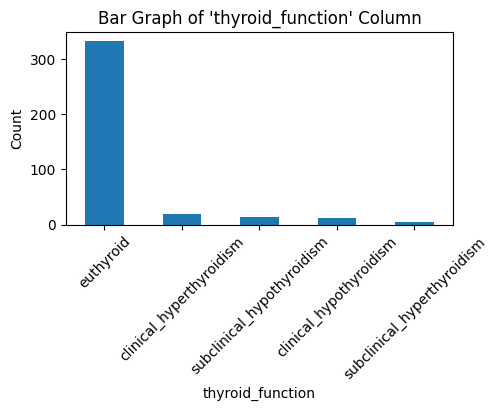

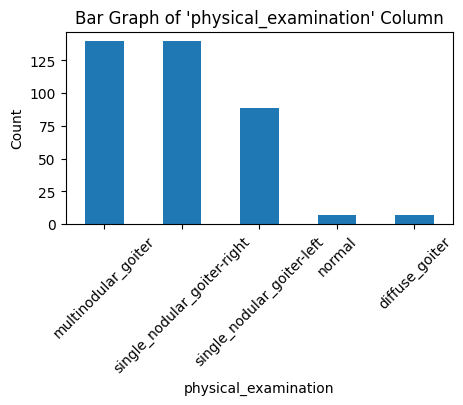

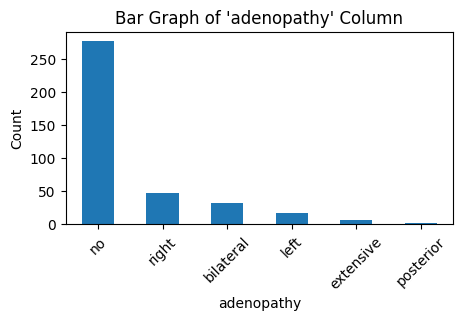

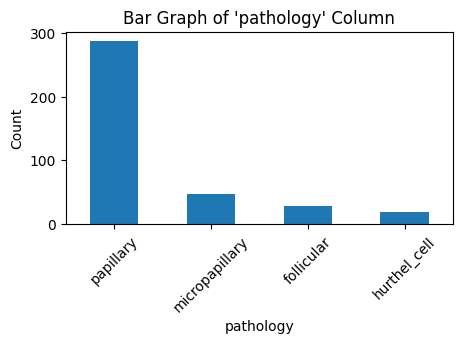

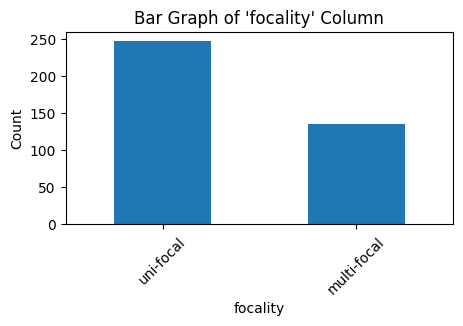

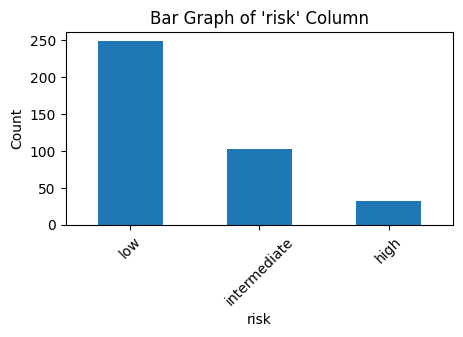

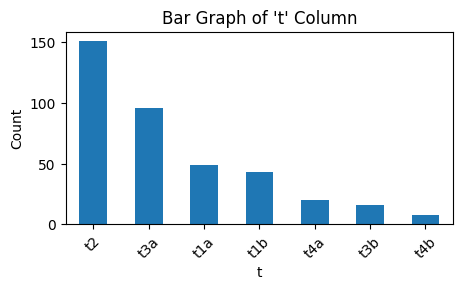

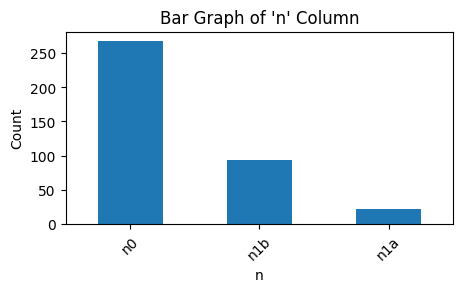

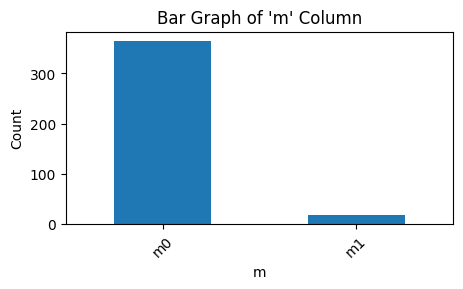

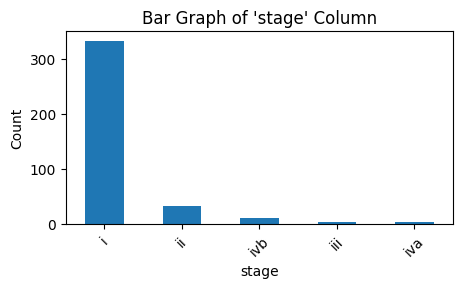

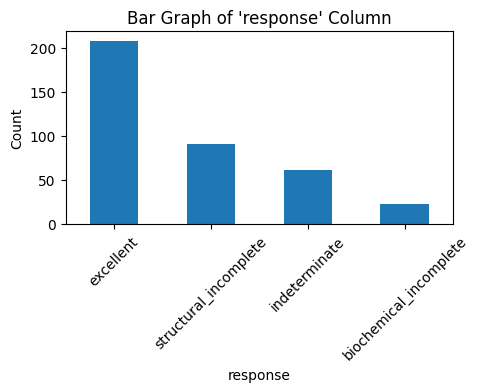

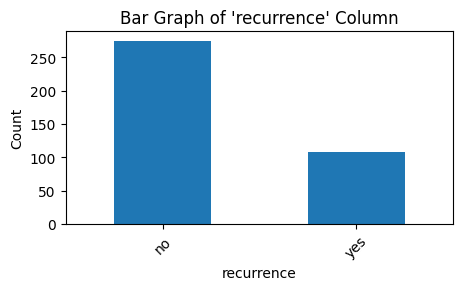

In [22]:
# I want to see the count / distribution and roughly the proportion of values within each column as a way to explore the data
# Bar graph for each categorical column
# Histogram for each numerical column

# the main wrapper function will quickly run them all but if any column seems to be interesting (like maybe need to modify the bin number on a particular histogram) then I can use the inidividal function as well 

MyCustDataSciLib.plot_all_graphs(df,'all', histo_bins = 50)

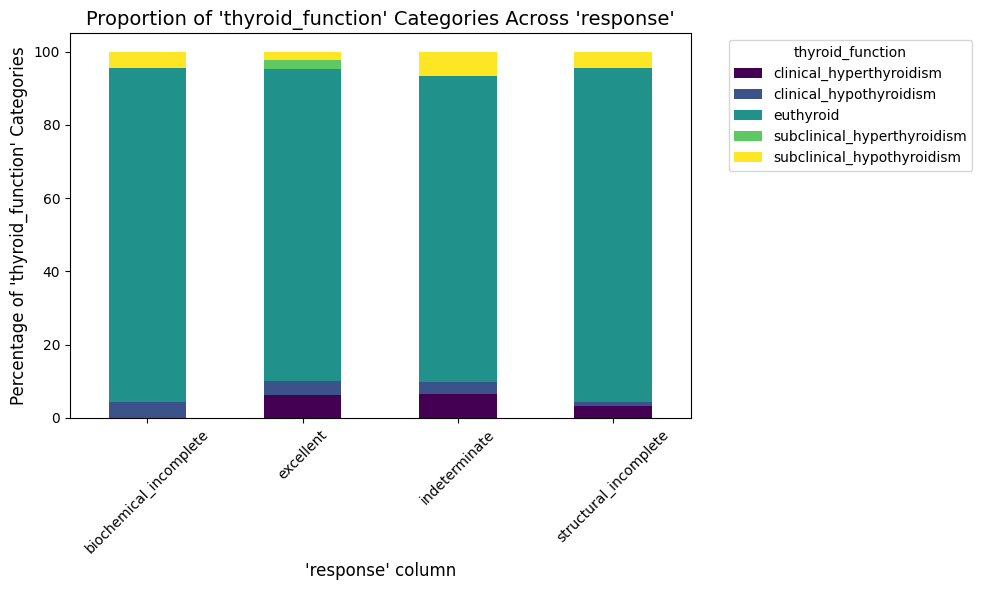

In [23]:
# stacked bar graph
    # Reminder - Stacked bar charts are used to show the proportion of categories in one column relative to the categories in another column.

MyCustDataSciLib.quick_stacked_bar_graph (df,'thyroid_function', 'response')

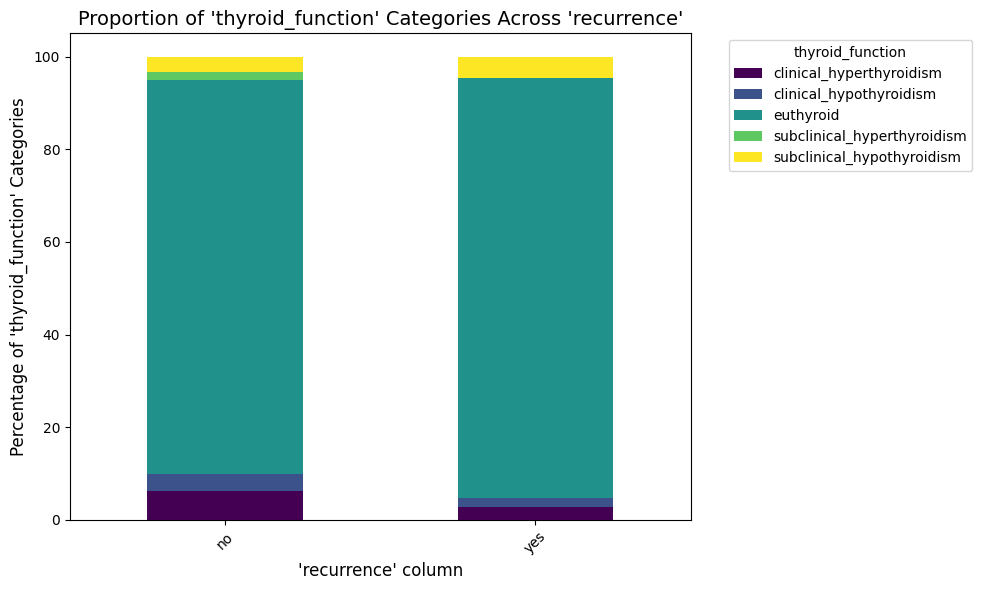

In [24]:
MyCustDataSciLib.quick_stacked_bar_graph (df,'thyroid_function', 'recurrence')

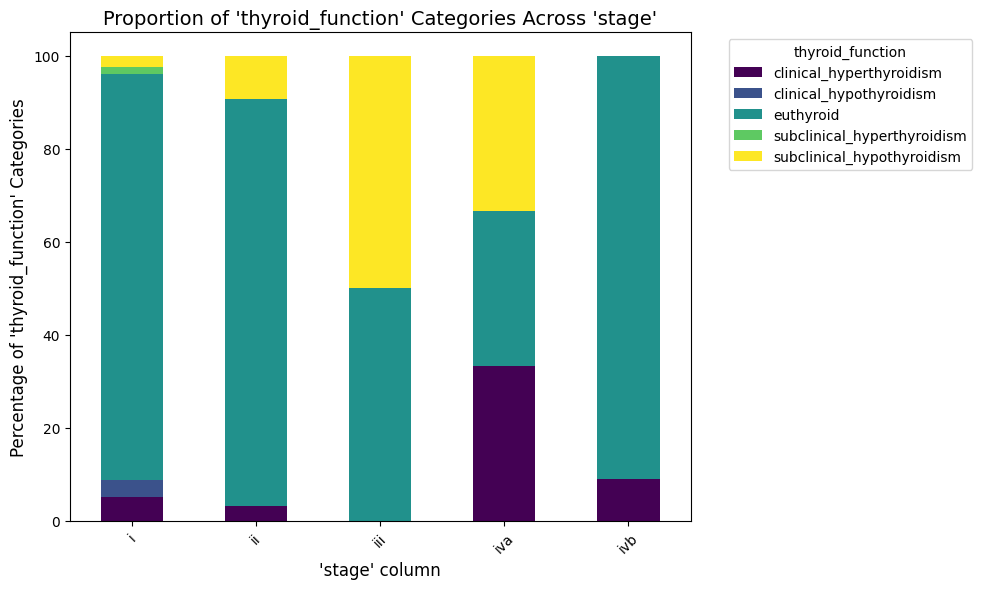

In [25]:
MyCustDataSciLib.quick_stacked_bar_graph (df,'thyroid_function', 'stage')

# in feature engineering can fuse these data together

# Relationships between 2 columns

In [13]:
MyCustDataSciLib.quick_chi_square_testing(df,'hx_smoking', 'response')

chi_square_testing between 'hx_smoking' and 'response'
Chi-square Statistic: 9.232695005584091
p-value: 0.02635184243447872 , which is TRUE
Degrees of Freedom: 3



('hx_smoking', 'response')

In [14]:
list_of_signifigant_col_relationship = MyCustDataSciLib.chi_square_test_all_col(df, 'thyroid_function', columns='all')

list_of_signifigant_col_relationship

chi_square_testing between 'thyroid_function' and 'gender'
Chi-square Statistic: 4.251990994209517
p-value: 0.37297544016341844 , which is FALSE
Degrees of Freedom: 4

chi_square_testing between 'thyroid_function' and 'smoking'
Chi-square Statistic: 1.976474144338391
p-value: 0.740086121277703 , which is FALSE
Degrees of Freedom: 4

chi_square_testing between 'thyroid_function' and 'hx_smoking'
Chi-square Statistic: 7.880657917672414
p-value: 0.0960489771470637 , which is FALSE
Degrees of Freedom: 4

chi_square_testing between 'thyroid_function' and 'hx_radiotherapy'
Chi-square Statistic: 8.213016122239718
p-value: 0.08407952141196084 , which is FALSE
Degrees of Freedom: 4

chi_square_testing between 'thyroid_function' and 'physical_examination'
Chi-square Statistic: 86.92480971812036
p-value: 9.183444948311274e-12 , which is TRUE
Degrees of Freedom: 16

chi_square_testing between 'thyroid_function' and 'adenopathy'
Chi-square Statistic: 14.059150707868795
p-value: 0.8274842318639781 ,

[('thyroid_function', 'physical_examination'),
 ('thyroid_function', 'n'),
 ('thyroid_function', 'stage')]

In [15]:
# List of categorical columns that may have potential dependencies
    # 'thyroid_function', 'physical_examination'
    # 'thyroid_function', 'n'
    # 'thyroid_function', 'stage'

In [16]:
# just testing out random methods of comparative analysis

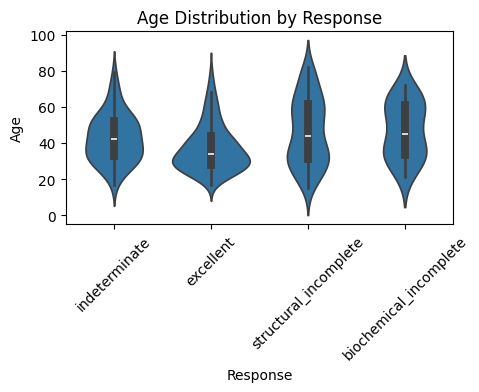

In [17]:
# Violin plot for `age` vs `response`
plt.figure(figsize=(5, 2.5))
sns.violinplot(x='response', y='age', data=df)
plt.title('Age Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

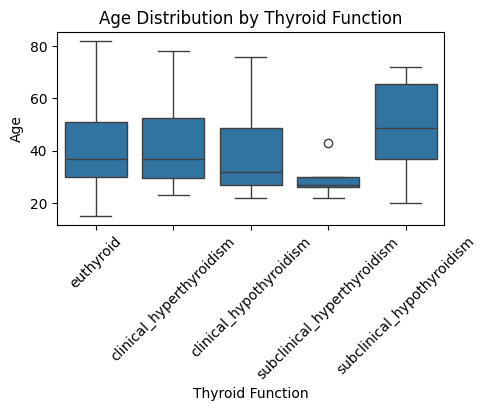

In [18]:
# Box plot for `age` vs `thyroid_function`
plt.figure(figsize=(5, 2.5))
sns.boxplot(x='thyroid_function', y='age', data=df)
plt.title('Age Distribution by Thyroid Function')
plt.xlabel('Thyroid Function')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Heat Maps for correlation between categorical columns

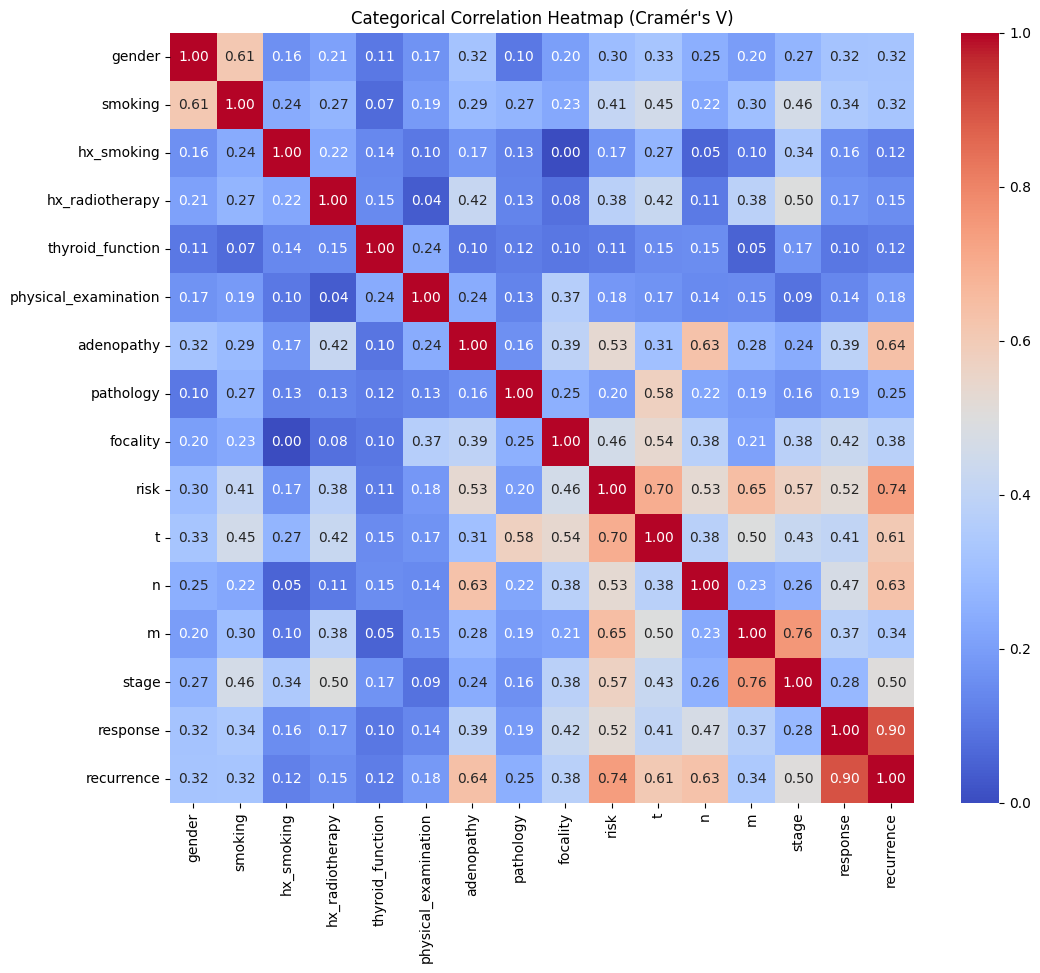

In [19]:
# Test the fixed function with the provided dataset
MyCustDataSciLib.categorical_correlation_heatmap_v3(df, columns='all')

In [20]:
# this correlation heat map is for numeric columns only 
'''
# Correlation heatmap for a set of numerical variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
'''

"\n# Correlation heatmap for a set of numerical variables\nsns.heatmap(df.corr(), annot=True, cmap='coolwarm')\nplt.show()\n"